# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## IMPORTANT: Guidelines for a proper conduct of the exercises
1. you should create code that is correct, simple, well organized, indented, commented, which uses self-explanatory names for variables and that is numerically efficient.
2. I expect a responsible interaction during the exercises: the questions should be more related to the conduction of the exercises and to the meaning of the results obtained than to the computational problems. Bugs are usual in coding; for this reason, sooner or later, one should learn to deal with them by oneself ... if you'll be able to, it will be your main achievement in this Laboratory!

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle $ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math 

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)


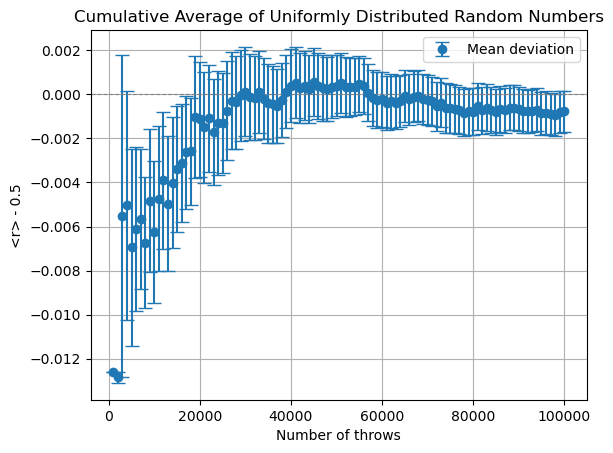

In [5]:
# Parameters
M = 100000  # Total number of throws
N = 100     # Number of blocks
L = int(M/N)  # Number of throws in each block, M should be a multiple of N

# Fixing random seed for reproducibility
np.random.seed(2)

# Generating random numbers uniformly distributed in [0,1)
r = np.random.rand(M)

# Arrays to store averages and squared averages
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

# Calculate averages and squared averages for each block
for i in range(N):
    sum1 = 0
    for j in range(L):
        k = j + i * L
        sum1 += r[k]
    ave[i] = sum1 / L  # r_i
    av2[i] = ave[i] ** 2  # (r_i)^2

# Calculate cumulative averages and their uncertainties
for i in range(N):
    for j in range(i + 1):
        sum_prog[i] += ave[j]  # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j]  # SUM_{j=0,i} (r_j)^2
    sum_prog[i] /= (i + 1)  # Cumulative average
    su2_prog[i] /= (i + 1)  # Cumulative square average
    err_prog[i] = error(sum_prog, su2_prog, i)  # Statistical uncertainty

# Plotting results
x = np.arange(1, N+1) * L  # Number of throws = block * (Number of throws in each block)
plt.errorbar(x, sum_prog - 0.5, yerr=err_prog, fmt='o', capsize=5, label='Mean deviation')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Number of throws')
plt.ylabel('<r> - 0.5')
plt.title('Cumulative Average of Uniformly Distributed Random Numbers')
plt.legend()
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

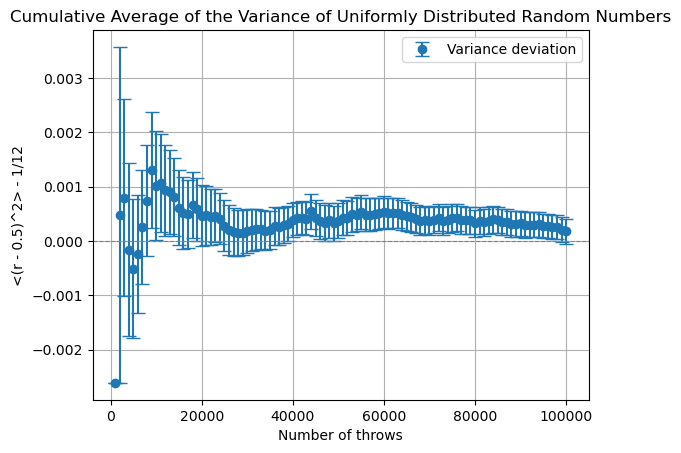

In [6]:
# Reinitialize arrays for the new calculation
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

# Calculate the variance estimate (r-0.5)^2 for each block
for i in range(N):
    sum1 = 0
    for j in range(L):
        k = j + i * L
        sum1 += (r[k] - 0.5) ** 2  # Accumulate measures
    ave[i] = sum1 / L  # Estimate in each block
    av2[i] = ave[i] ** 2

# Calculate cumulative averages and their uncertainties
for i in range(N):
    for j in range(i + 1):
        sum_prog[i] += ave[j]
        su2_prog[i] += av2[j]
    sum_prog[i] /= (i + 1)  # Cumulative average
    su2_prog[i] /= (i + 1)  # Cumulative square average
    err_prog[i] = error(sum_prog, su2_prog, i)  # Statistical uncertainty

# Plotting results
plt.errorbar(x, sum_prog - 1/12, yerr=err_prog, fmt='o', capsize=5, label='Variance deviation')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Number of throws')
plt.ylabel('<(r - 0.5)^2> - 1/12')
plt.title('Cumulative Average of the Variance of Uniformly Distributed Random Numbers')
plt.legend()
plt.grid(True)
plt.show()

### Data Blocking
The data blocking method involves grouping individual measurements $x_i$(whether direct or indirect) into N blocks, within each of which the mean $\langle x\rangle = \frac{1}{L}\sum_{i=1}^L x_i $ and standard deviation $\sigma = \sqrt{\langle x^2 \rangle-\langle x \rangle^2}$ are calculated.

Data blocking is crucial for reducing correlations between adjacent blocks, thus it can be used to simulate subsequent experiments that are uncorrelated. As we will see in more detail in exercise 7, to effectively achieve this, it is sometimes necessary to analyze the autocorrelation between successive measurements and adjust the block size $L$ accordingly to make it much larger than the "correlation time."

The data blocking method is also useful for observing the progressive trend of measurements being conducted in the simulation, providing additional information beyond just the final result with its respective uncertainty.

Here i calculate the mean value and its variance of a uniform distribution between $[0,1]$ using the random number generator in /RndGen.


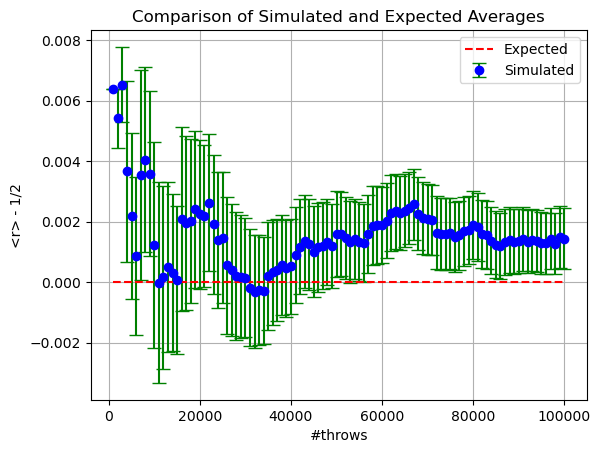

In [13]:
# Load data from file
x, y, error = np.loadtxt("data/average.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# Plotting
plt.errorbar(x, y - 1/2, yerr=error, label='Simulated', fmt='o',color='blue', ecolor='green', capsize=5)
plt.plot(x, np.zeros(len(x)), label='Expected', color='red', linestyle='--')

# Customize plot
plt.xlabel('#throws')
plt.ylabel('<r> - 1/2')
plt.title('Comparison of Simulated and Expected Averages')
plt.legend()
plt.grid(True)
plt.show()

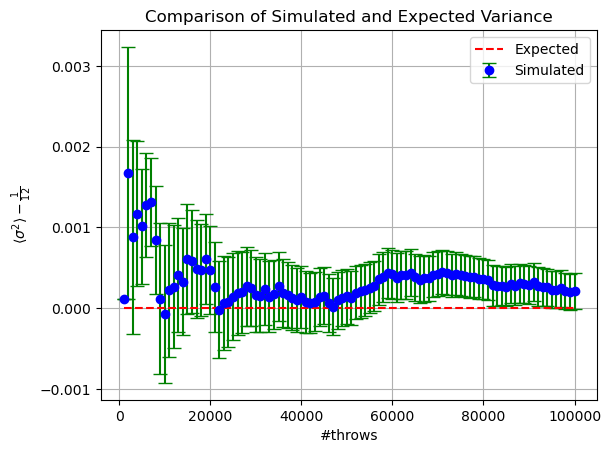

In [12]:
# Load data from file
x, y, error = np.loadtxt("data/variance.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# Plotting
plt.errorbar(x, y - 1/12, yerr=error, label='Simulated', fmt='o', color='blue', ecolor='green', capsize=5)
plt.plot(x, np.zeros_like(x), label='Expected', color='red', linestyle='--')

# Customize plot
plt.xlabel('#throws')
plt.ylabel(r'$\langle \sigma^2 \rangle - \frac{1}{12}$')
plt.title('Comparison of Simulated and Expected Variance')
plt.legend()
plt.grid(True)
plt.show()

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

For more statistics and better plot, i decided to do the above procedure 10000 times, i.e  each time i generate $10^4$ pseudo-random numbers uniformely distributed in $[0,1]$ and divide them into $M=100$ bins keeping track on how many points $n_i$ land in each bin, then use the above to calculate one value of $\Chi^2$, now i collect all of the $10^4$ values of $\Chi^2$ put them in a histogram, then fit with the analytic distribution of $\Chi^2$. The number of degree of freedom should be $100$ as the number of bins M, but i found that dof = 99 seems to fit the distribution better.

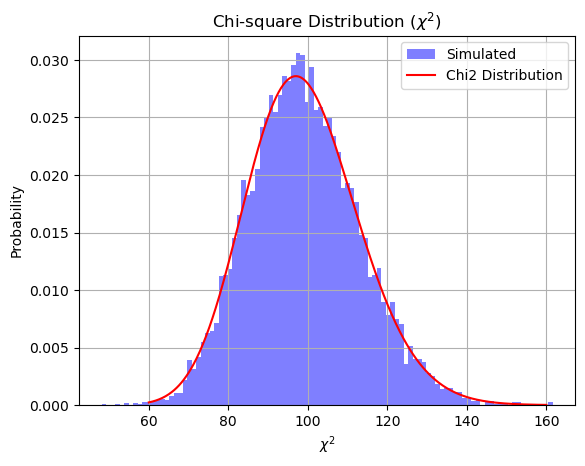

In [17]:
from scipy.stats import chi2

# Import chi2 values generated from C++ code
chi_2 = np.loadtxt("data/Chi2.dat", unpack=True)

# Define number of bins for histogram
num_bins = 100

# Plot histogram of chi2 values
plt.hist(chi_2, num_bins, facecolor='blue', alpha=0.5, density=True, label='Simulated')

# Degrees of freedom for chi2 distribution
df = 100 -1

# Generate x values for chi2 distribution plot
x = np.linspace(60, 160, 500)

# Calculate chi2 distribution values
y = chi2.pdf(x, df)

# Plot chi2 distribution curve
plt.plot(x, y, 'r-', label='Chi2 Distribution')

# Customize plot
plt.grid(True)
plt.xlabel('$\chi^2$')
plt.ylabel('Probability')
plt.title(r'Chi-square Distribution ($\chi^2$)')
plt.legend()

plt.show()

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

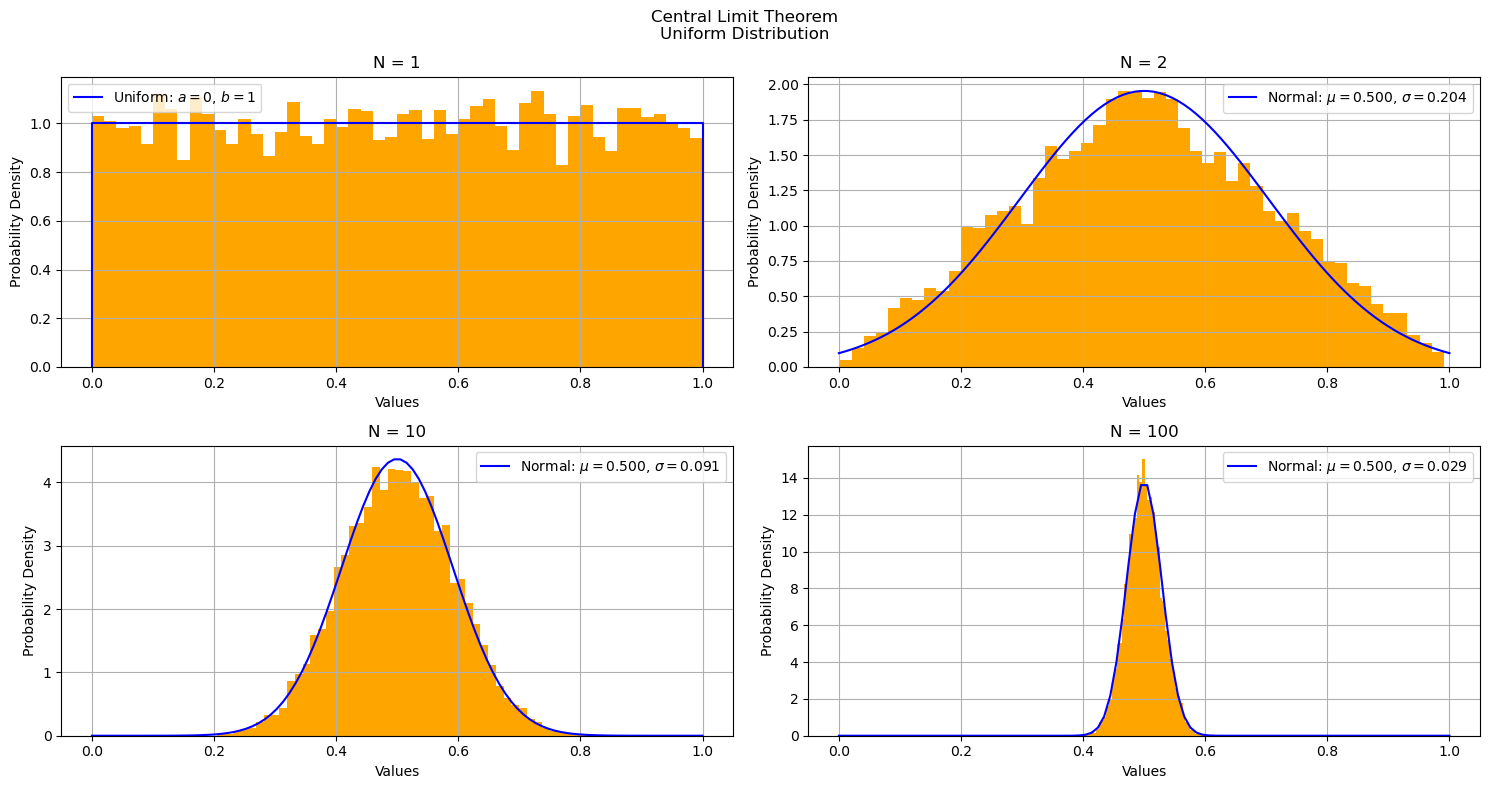

In [27]:
# Load data from files for uniform distribution
uniforme = np.array([np.loadtxt(f"data/Standard_dice_{i}.dat", unpack=True) for i in [1, 2, 10, 100]])

# Titles for subplots
titoli = np.array([['N = 1', "N = 2"],
                   ['N = 10', 'N = 100']])

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Parameters for the expected normal distribution from the central limit theorem
mu = 1/2
sigm = np.array([0, math.sqrt(1/(12*2)), math.sqrt(1/(12*10)), math.sqrt(1/(12*100))])
inf = np.array([0, 0, 0, 0])
sup = np.array([1, 1, 1, 1])

# Iterate to populate the subplots
for i in range(2):  # Rows
    for j in range(2):  # Columns
        ax = axes[i][j]
        ax.hist(uniforme[i * 2 + j], bins=50, density=True, facecolor='orange')

        # Select the correct expected normal distribution from the central limit theorem
        if i == 0 and j == 0:
            # For N=1, plot a uniform distribution rectangle
            ax.plot(np.array([0, 0, 1, 1]), np.array([0, 1, 1, 0]), color='blue', label='Uniform: $a=0$, $b=1$')
        else:
            # For N>1, plot the corresponding normal distribution
            sigma = sigm[i * 2 + j]
            x = np.linspace(inf[i * 2 + j], sup[i * 2 + j], 100)
            y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
            ax.plot(x, y, color='blue', label=f'Normal: $\mu = {mu:.3f}$, $\sigma = {sigma:.3f}$')

        # Set grid, labels, and titles for the subplots
        ax.grid(True)
        ax.set_xlabel('Values')
        ax.set_ylabel('Probability Density')
        ax.set_title(titoli[i][j])
        ax.legend()

# Set the main title for the figure
fig.suptitle('Central Limit Theorem\nUniform Distribution')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Alternative way of visualizing data, one difference is that i also fit $S_1$ with a gaussian.

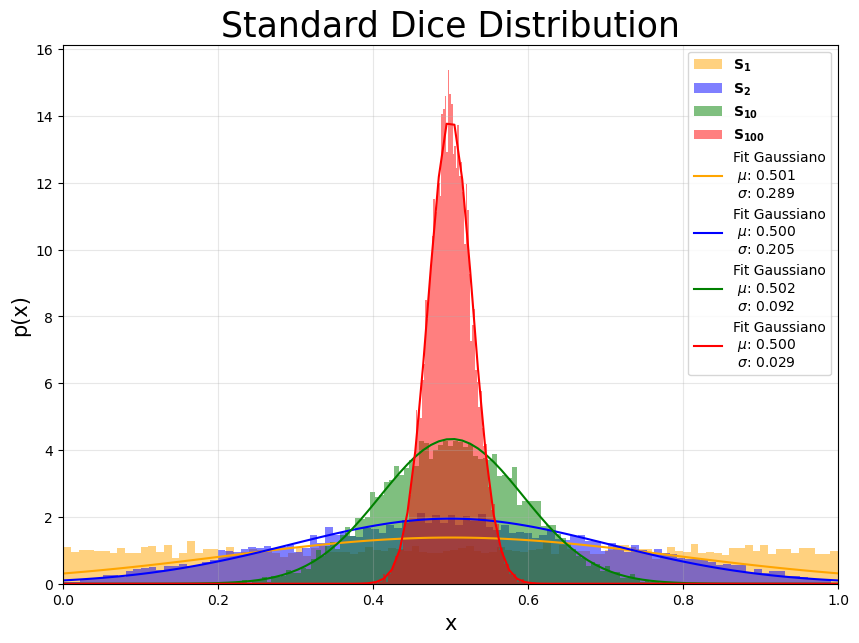

In [22]:
from scipy.stats import norm
# Define figure size
fig = plt.figure(figsize=(10, 7))

# Color scheme and labels for each dataset
colors = ["orange", "blue", "green", "red"]
labels = ['$\mathbf{S_1}$', '$\mathbf{S_2}$', '$\mathbf{S_{10}}$', '$\mathbf{S_{100}}$']
bins = 100

# Load data for standard dice distributions from files
std = np.array([np.loadtxt(f"data/Standard_dice_{i}.dat", unpack=True) for i in [1, 2, 10, 100]])

# Plot histograms and Gaussian fits for each dataset
for i in range(4):
    # Plot histogram with transparency and labeled legend
    plt.hist(std[i], bins, color=colors[i], density=True, alpha=0.5, label=labels[i])

# Generate x values for plotting the Gaussian fit
x = np.linspace(0, 1, bins)

# Fit Gaussian distribution to each dataset and plot
for i in range(4):
    # Fit Gaussian parameters (mean and standard deviation)
    params = norm.fit(std[i])
    
    # Plot Gaussian distribution curve
    plt.plot(x, norm.pdf(x, *params), color=colors[i], linestyle='-', label=f"Fit Gaussiano\n $\mu$: {params[0]:.3f}\n $\sigma$: {params[1]:.3f}")

# Set labels, title, grid, limits, and legend
plt.xlabel("x", fontsize=15)
plt.ylabel('p(x)', fontsize=15)
plt.title("Standard Dice Distribution", fontsize=25)
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.legend()

# Display the plot
plt.show()


Observe that between $\sigma_1 = 0.289$ and $\sigma_{100}=0.029$ there's a factor $\frac{1}{10} = \frac{1}{\sqrt{100}}$, this is a consequence of the Central Limit Theorem.

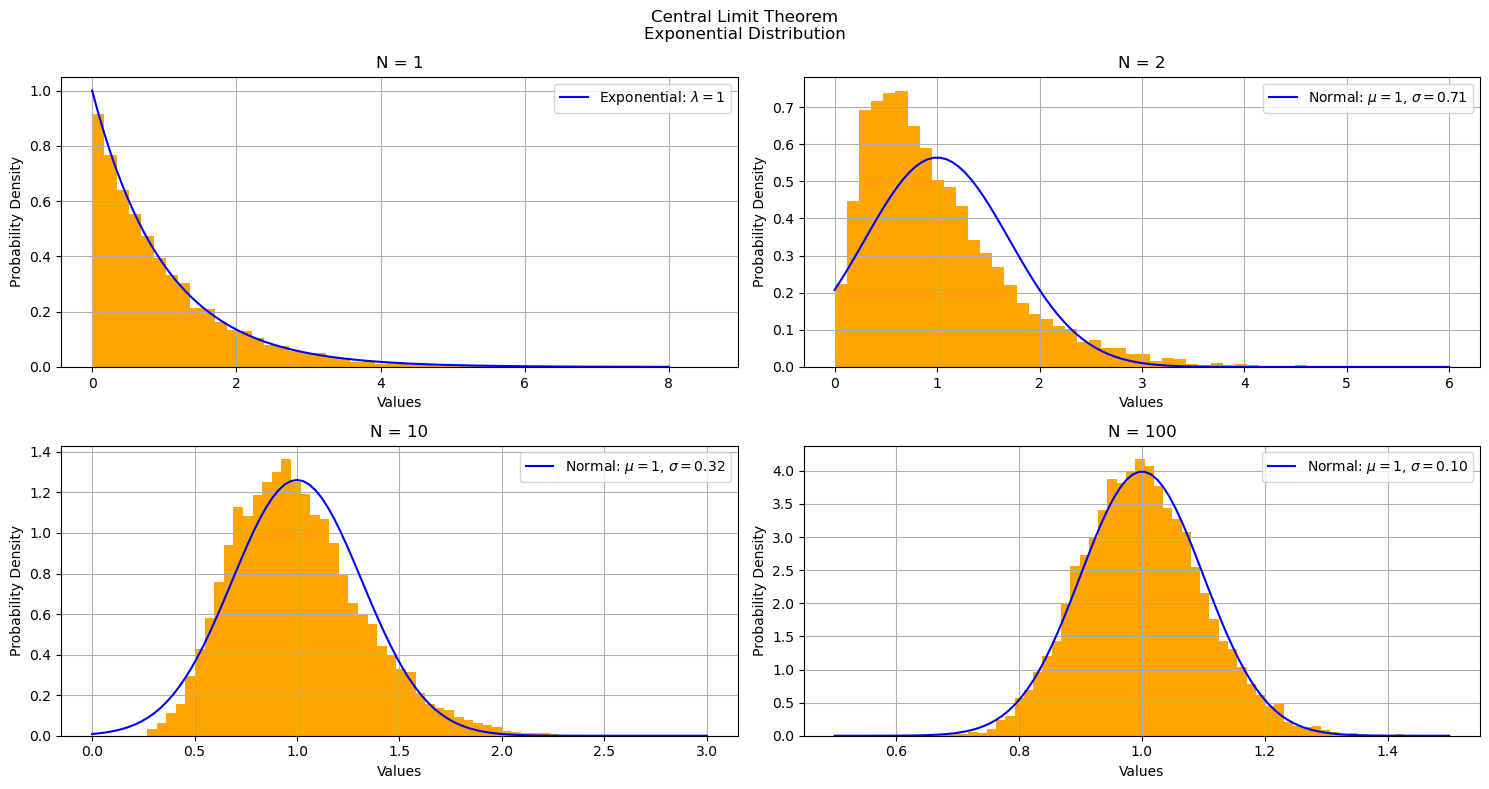

In [25]:
# Load data for exponential distribution from files
exp = np.array([np.loadtxt(f"data/Exponential_dice_{i}.dat", unpack=True) for i in [1, 2, 10, 100]])

# Titles for subplots
titles = np.array([['N = 1', "N = 2"],
                   ['N = 10', 'N = 100']])

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Parameters for the exponential distribution and expected normal distribution from CLT
mu = 1
sigma = np.array([0, math.sqrt(1/2), math.sqrt(1/10), math.sqrt(1/100)])
xmin = np.array([0, 0, 0.0, 0.5])
xmax = np.array([1, 6, 3, 1.5])

# Iterate to populate the subplots
for i in range(2):  # Rows
    for j in range(2):  # Columns
        ax = axes[i][j]
        ax.hist(exp[i * 2 + j], bins=50, density=True, facecolor='orange')

        if i == 0 and j == 0:
            # Plot the exponential distribution for N = 1
            x = np.linspace(0, 8, 100)
            y = np.exp(-x)
            ax.plot(x, y, color='blue', label='Exponential: $\lambda = 1$')
        else:
            # Plot the normal distribution approximation for N > 1 using CLT
            sig = sigma[i * 2 + j]
            x = np.linspace(xmin[i * 2 + j], xmax[i * 2 + j], 100)
            y = (1 / (sig * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sig)**2)
            ax.plot(x, y, color='blue', label=f'Normal: $\mu = 1$, $\sigma = {sig:.2f}$')

        ax.grid(True)
        ax.set_xlabel('Values')
        ax.set_ylabel('Probability Density')
        ax.set_title(titles[i][j])
        ax.legend()

# Set the main title for the figure
fig.suptitle('Central Limit Theorem\nExponential Distribution')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


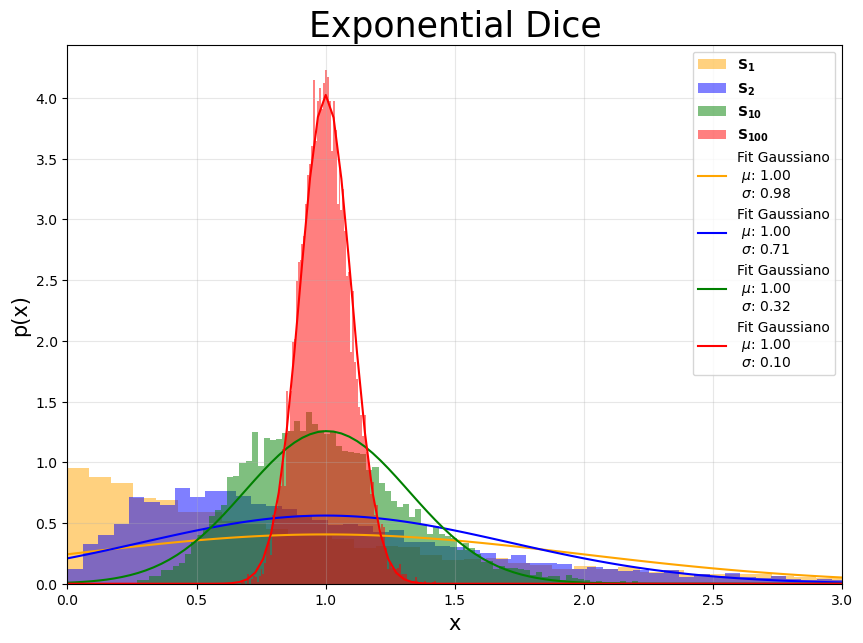

In [24]:
# Load data for exponential distribution from files
exp = np.array([np.loadtxt(f"data/Exponential_dice_{i}.dat", unpack=True) for i in [1, 2, 10, 100]])

# Define figure size and colors for plotting
fig = plt.figure(figsize=(10, 7))
colors = ["orange", "blue", "green", "red"]
labels = ['$\mathbf{S_1}$', '$\mathbf{S_2}$', '$\mathbf{S_{10}}$', '$\mathbf{S_{100}}$']
bins = 100

# Plot histograms for each dataset
for i in range(4):
    plt.hist(exp[i], bins, color=colors[i], density=True, alpha=0.5, label=labels[i])

# Fit and plot Gaussian distribution for each dataset
for i in range(4):
    x = np.linspace(0, 3, bins)  # x-axis range for plotting
    params = norm.fit(exp[i])    # Fit Gaussian parameters (mean and standard deviation)
    plt.plot(x, norm.pdf(x, *params), color=colors[i], linestyle='-', 
             label=f"Fit Gaussiano\n $\mu$: {params[0]:.2f}\n $\sigma$: {params[1]:.2f}")

# Set labels, title, grid, limits, and legend
plt.xlabel("x", fontsize=15)
plt.ylabel('p(x)', fontsize=15)
plt.title("Exponential Dice", fontsize=25)
plt.grid(True, alpha=0.3)
plt.xlim(0, 3)  # Limit x-axis to range [0, 3]
plt.legend()

# Display the plot
plt.show()

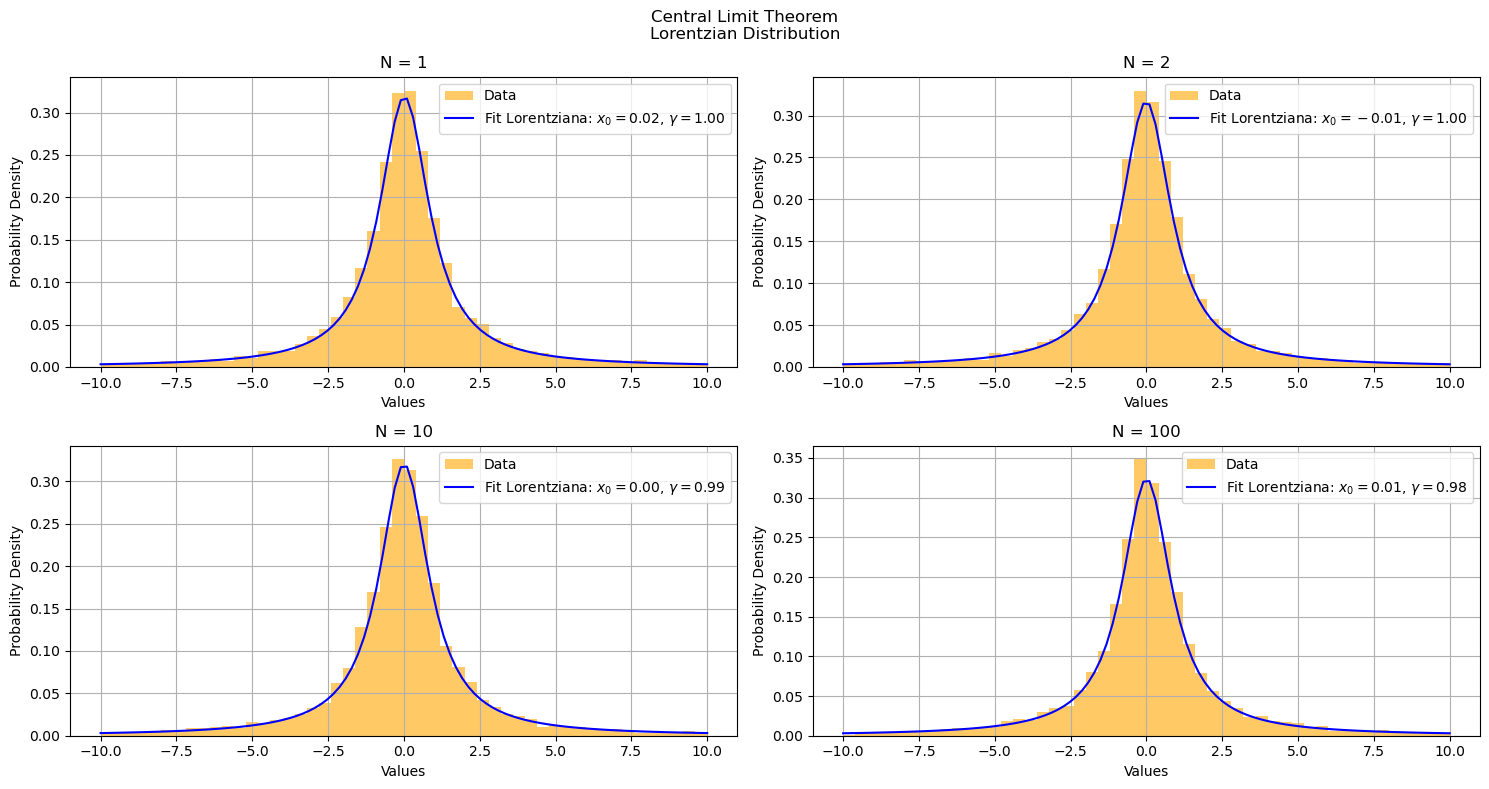

In [31]:
from scipy.stats import cauchy

# Load data from files for Lorentzian distribution
lorentziana = np.array([np.loadtxt(f"data/Lorentz_dice_{i}.dat", unpack=True) for i in [1, 2, 10, 100]])

# Titles for subplots
titoli = np.array([['N = 1', "N = 2"], ['N = 10', 'N = 100']])

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Iterate to populate the subplots
for i in range(2):  # Rows
    for j in range(2):  # Columns
        ax = axes[i][j]
        
        # Determine the correct index for accessing data
        k = i * 2 + j

        # Plot the histogram of the data
        data = lorentziana[k]
        ax.hist(data, bins=50, density=True, facecolor='orange', range=(-10, 10), alpha=0.6, label='Data')
        
        # Fit the Lorentzian (Cauchy) distribution to the data
        params = cauchy.fit(data)
        x0, gamma = params[0], params[1]
        
        # Calculate the Lorentzian (Cauchy) distribution
        x = np.linspace(-10, 10, 100)
        y = cauchy.pdf(x, loc=x0, scale=gamma)

        # Plot the fitted Lorentzian distribution
        ax.plot(x, y, color='blue', label=f'Fit Lorentziana: $x_0 = {x0:.2f}$, $\gamma = {gamma:.2f}$')
        
        # Set grid, labels, and titles for the subplots
        ax.grid(True)
        ax.set_xlabel('Values')
        ax.set_ylabel('Probability Density')
        ax.set_title(titoli[i][j])
        ax.legend()

# Set the main title for the figure
fig.suptitle('Central Limit Theorem\nLorentzian Distribution')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

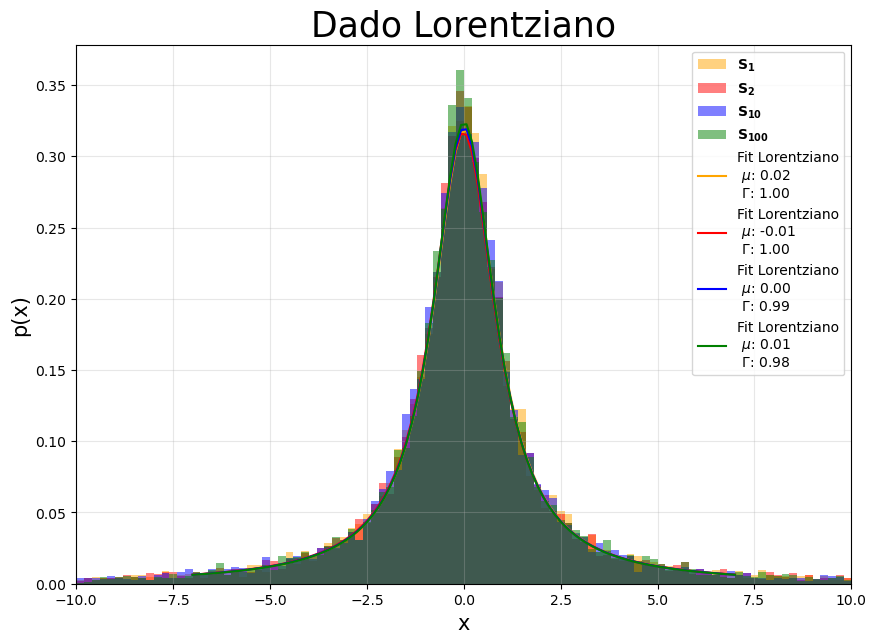

In [32]:

# Create a figure for the plots
fig = plt.figure(figsize=(10,7))

# Define colors and labels for the histograms
colors = ['orange', 'red', 'blue', 'green']
labels = ['$\mathbf{S_1}$', '$\mathbf{S_2}$', '$\mathbf{S_{10}}$', '$\mathbf{S_{100}}$']
bins = 100

# Load data for Lorentzian distribution from files
lor = np.array([np.loadtxt(f"data/Lorentz_dice_{i}.dat", unpack=True) for i in [1, 2, 10, 100]])

# Plot the histograms of the data
for i in range(4):
    plt.hist(lor[i], bins, range=(-10, 10), color=colors[i], density=True, label=labels[i], alpha=0.5)

# Define the range for the x-axis
x = np.linspace(-7, 7, bins)

# Fit the data to a Lorentzian (Cauchy) distribution and plot the fits
for i in range(4):
    params = cauchy.fit(lor[i])  # Fit the data
    y = cauchy.pdf(x, *params)  # Calculate the PDF of the Lorentzian distribution
    plt.plot(x, y, color=colors[i], linestyle='-', label=f"Fit Lorentziano\n $\mu$: {params[0]:.2f}\n $\Gamma$: {params[1]:.2f}")

# Set labels and title
plt.xlabel("x", fontsize=15)
plt.ylabel('p(x)', fontsize=15)
plt.title("Dado Lorentziano", fontsize=25)

# Add a grid and limit the x-axis range
plt.grid(True, alpha=0.3)
plt.xlim(-10, 10)

# Add a legend
plt.legend()

# Show the plot
plt.show()

We observe that everything is according to the Central Limit Theorem, summing and averaging varibles distributed according to finite variance distribution tends to be distributed as a Gaussian with the sum or average as the mean value of the Gaussian, and variance of the distribution over N as the variance of the Gaussian. For variables that follows Cauchy Distribution this doesn't hold since the Cauchy-Lorentz distribution has infinite variance, but it also acts as an attractor thanks to the fact that its fourier transform is an exponential and a product of exponential is again an expontial, i.e again a variable that follows the Cauchy Lorentz distribution.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

For this exercise i chose $M=10^6$ throws and $N=100$ blocks.

To start with, notice that the problem is invariant for rotation and translation of L in the direction orthogonal to the needle and complete translational invariance in the direction parallel to the needles. We can restrict ourself to a particular setup with 2 horizontal(rotation invariance) lines separated by L and apply periodic boundary condition (translation invariance). 

I chose a starting point $y_1= rnd.Rannyu(0., d)$ as the y coordinate of the center of the needle (x_1 is not important because the problem is translation invariant), then i chose $(x_2,y_2)$ inside a circumference of radius 1 (so it will have lenght less than 1), then i rescale $y_2$ by the length of the vector (x_2,y_2), the new variable y_2 after these operations should be distributed as $sin\theta$, so now i just have to check if $y= y_1+y_2$ crosses one ot the 2 needles at $y=0$ and $y=L$. 

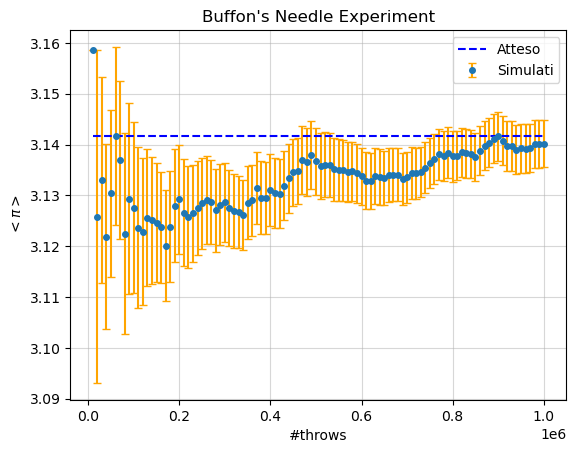

In [33]:
# Load data from the file 'buffon.dat'
x, y, error = np.loadtxt("data/buffon.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# Plot the error bars for the simulated data
plt.errorbar(x, y, yerr=error, label='Simulati', fmt='o', ecolor='orange', capsize=3, markersize=4, linestyle='None')

# Plot the expected value of pi as a horizontal line
plt.plot(x, np.full(len(x), 3.141592), label='Atteso', color='blue', linestyle='--')

# Set the title and labels for the plot
plt.title('Buffon\'s Needle Experiment')
plt.xlabel(r'#throws')
plt.ylabel(r'$<\pi>$')

# Add grid lines for better readability
plt.grid(True, alpha=0.5)

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?